In [ ]:
!pip install kaggle
"""
To use the Kaggle API, sign up for a Kaggle account at https://www.kaggle.com. 
Then go to the 'Account' tab of your user profile (https://www.kaggle.com/<username>/account) and select 'Create API Token'. 
This will trigger the download of kaggle.json, a file containing your API credentials.
Upload that file to google colab/google cloud platform 
"""
api_token = {"username":"surabhimv","key":"6486570e714dc5adf89e540c7913012d"}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Loading the Data

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c 'telstra-recruiting-network'

  0% 0.00/557k [00:00<?, ?B/s]
100% 557k/557k [00:00<00:00, 107MB/s]


In [ ]:
!unzip telstra-recruiting-network.zip                                           #unzipping the telstra-recruiting-network file

Archive:  telstra-recruiting-network.zip
  inflating: event_type.csv.zip      
  inflating: log_feature.csv.zip     
  inflating: resource_type.csv.zip   
  inflating: sample_submission.csv.zip  
  inflating: severity_type.csv.zip   
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [ ]:
!unzip event_type.csv.zip                                                       #unzipping the  files

Archive:  event_type.csv.zip
replace event_type.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip log_feature.csv.zip

Archive:  log_feature.csv.zip
replace log_feature.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip resource_type.csv.zip

Archive:  resource_type.csv.zip
  inflating: resource_type.csv       


In [ ]:
!unzip severity_type.csv.zip

Archive:  severity_type.csv.zip
replace severity_type.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip train.csv.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip test.csv.zip

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [53]:
import warnings
warnings.filterwarnings("ignore")
from multiprocessing import Process# this is used for multithreading
import multiprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import re 

In [54]:
df1=pd.read_csv('event_type.csv')                                               #reading the event_type.csv file
print(df1)

         id     event_type
0      6597  event_type 11
1      8011  event_type 15
2      2597  event_type 15
3      5022  event_type 15
4      5022  event_type 11
...     ...            ...
31165  3761  event_type 11
31166  8720  event_type 11
31167  6488  event_type 11
31168   878  event_type 11
31169  4464  event_type 11

[31170 rows x 2 columns]


In [55]:
df2=pd.read_csv('log_feature.csv')                                              #reading the log_feature.csv file
print(df2)

         id  log_feature  volume
0      6597   feature 68       6
1      8011   feature 68       7
2      2597   feature 68       1
3      5022  feature 172       2
4      5022   feature 56       1
...     ...          ...     ...
58666  8720  feature 209       1
58667  6488   feature 54       3
58668   878   feature 62       1
58669  4464  feature 209       1
58670  4464   feature 87       2

[58671 rows x 3 columns]


In [56]:
df3=pd.read_csv('resource_type.csv')                                            #reading the resource_type.csv file
print(df3)

         id    resource_type
0      6597  resource_type 8
1      8011  resource_type 8
2      2597  resource_type 8
3      5022  resource_type 8
4      6852  resource_type 8
...     ...              ...
21071  3761  resource_type 8
21072  8720  resource_type 8
21073  6488  resource_type 8
21074   878  resource_type 8
21075  4464  resource_type 8

[21076 rows x 2 columns]


In [57]:
df3['resource_type'].unique()                                                   #finding the unique features in 'resource_type' column

array(['resource_type 8', 'resource_type 2', 'resource_type 1',
       'resource_type 9', 'resource_type 6', 'resource_type 7',
       'resource_type 10', 'resource_type 4', 'resource_type 3',
       'resource_type 5'], dtype=object)

In [58]:
dummies = pd.get_dummies(df3.resource_type)                                     #as the resourse_type contain 10  unnique values (onehot encoding is done )
print(dummies)                                                                  #after doing the one hot encoding  dummy variables are formed

       resource_type 1  resource_type 10  resource_type 2  resource_type 3  \
0                    0                 0                0                0   
1                    0                 0                0                0   
2                    0                 0                0                0   
3                    0                 0                0                0   
4                    0                 0                0                0   
...                ...               ...              ...              ...   
21071                0                 0                0                0   
21072                0                 0                0                0   
21073                0                 0                0                0   
21074                0                 0                0                0   
21075                0                 0                0                0   

       resource_type 4  resource_type 5  resource_type 6  resou

In [59]:
df3 = pd.concat([df3,dummies],axis=1)                                           #concatinating the df3 dataframe with resource_type dummies 
print(df3)                                           

         id    resource_type  resource_type 1  resource_type 10  \
0      6597  resource_type 8                0                 0   
1      8011  resource_type 8                0                 0   
2      2597  resource_type 8                0                 0   
3      5022  resource_type 8                0                 0   
4      6852  resource_type 8                0                 0   
...     ...              ...              ...               ...   
21071  3761  resource_type 8                0                 0   
21072  8720  resource_type 8                0                 0   
21073  6488  resource_type 8                0                 0   
21074   878  resource_type 8                0                 0   
21075  4464  resource_type 8                0                 0   

       resource_type 2  resource_type 3  resource_type 4  resource_type 5  \
0                    0                0                0                0   
1                    0                0  

In [60]:
df4=pd.read_csv('severity_type.csv')                                            #reading the 'severity_type.csv'  
print(df4)

         id    severity_type
0      6597  severity_type 2
1      8011  severity_type 2
2      2597  severity_type 2
3      5022  severity_type 1
4      6852  severity_type 1
...     ...              ...
18547  3761  severity_type 1
18548  8720  severity_type 1
18549  6488  severity_type 2
18550   878  severity_type 2
18551  4464  severity_type 1

[18552 rows x 2 columns]


In [61]:
df4['severity_type'].unique()                                                   #getting the unique featurees of 'severity_type'


array(['severity_type 2', 'severity_type 1', 'severity_type 4',
       'severity_type 5', 'severity_type 3'], dtype=object)

In [62]:
dummies1 = pd.get_dummies(df4.severity_type)                                    #getting the dummie variables of severity_type                   #
print(dummies1)

       severity_type 1  severity_type 2  severity_type 3  severity_type 4  \
0                    0                1                0                0   
1                    0                1                0                0   
2                    0                1                0                0   
3                    1                0                0                0   
4                    1                0                0                0   
...                ...              ...              ...              ...   
18547                1                0                0                0   
18548                1                0                0                0   
18549                0                1                0                0   
18550                0                1                0                0   
18551                1                0                0                0   

       severity_type 5  
0                    0  
1                    0  


In [63]:
df4= pd.concat([df4,dummies1],axis=1)                                           #concatinating the df4 and "severity_type" features dummies
print(df4)

         id    severity_type  severity_type 1  severity_type 2  \
0      6597  severity_type 2                0                1   
1      8011  severity_type 2                0                1   
2      2597  severity_type 2                0                1   
3      5022  severity_type 1                1                0   
4      6852  severity_type 1                1                0   
...     ...              ...              ...              ...   
18547  3761  severity_type 1                1                0   
18548  8720  severity_type 1                1                0   
18549  6488  severity_type 2                0                1   
18550   878  severity_type 2                0                1   
18551  4464  severity_type 1                1                0   

       severity_type 3  severity_type 4  severity_type 5  
0                    0                0                0  
1                    0                0                0  
2                    0        

In [64]:
df5=pd.read_csv('train.csv')                                                    #reading the "train.csv" it contain the class variables
print(df5)

         id       location  fault_severity
0     14121   location 118               1
1      9320    location 91               0
2     14394   location 152               1
3      8218   location 931               1
4     14804   location 120               0
...     ...            ...             ...
7376    870   location 167               0
7377  18068   location 106               0
7378  14111  location 1086               2
7379  15189     location 7               0
7380  17067   location 885               0

[7381 rows x 3 columns]


In [65]:
df=pd.read_csv('test.csv')                                                      #reading the test.csv it does not contain class variables so not used
print(df)

          id       location
0      11066   location 481
1      18000   location 962
2      16964   location 491
3       4795   location 532
4       3392   location 600
...      ...            ...
11166  14806  location 1073
11167   1825    location 11
11168   2374   location 917
11169   7277   location 208
11170   9886   location 438

[11171 rows x 2 columns]


##Data Preprocessing

In [66]:
d2=df2['log_feature'].values                                                    #preprocessing the "log_feature".as each value in the log_feature contain (categorical part and numeric value).so as part of preprocessing this categorical part is removed.
s2=[]
for i in d2:
  q=re.findall(r'\d+',i)
  q1=''.join(q)
  s2.append(int(q1))
df2['log_feature']=s2
print(df2)

         id  log_feature  volume
0      6597           68       6
1      8011           68       7
2      2597           68       1
3      5022          172       2
4      5022           56       1
...     ...          ...     ...
58666  8720          209       1
58667  6488           54       3
58668   878           62       1
58669  4464          209       1
58670  4464           87       2

[58671 rows x 3 columns]


In [67]:
d1=df1['event_type'].values                                                     #preprocessing the "event_type".as each value in the log_feature contain (categorical part and numeric value).so as part of preprocessing this categorical part is removed.
s3=[]
for i in d1:
  q=re.findall(r'\d+',i)
  q1=''.join(q)
  s3.append(int(q1))
df1['event_type']=s3
print(df1)

         id  event_type
0      6597          11
1      8011          15
2      2597          15
3      5022          15
4      5022          11
...     ...         ...
31165  3761          11
31166  8720          11
31167  6488          11
31168   878          11
31169  4464          11

[31170 rows x 2 columns]


In [68]:
d5=df5['location'].values                                                       #preprocessing the "location".as each value in the log_feature contain (categorical part and numeric value).so as part of preprocessing this categorical part is removed.
s5=[]
for i in d5:
  q=re.findall(r'\d+',i)
  q1=''.join(q)
  s5.append(int(q1))
df5['location']=s5
print(df5)

         id  location  fault_severity
0     14121       118               1
1      9320        91               0
2     14394       152               1
3      8218       931               1
4     14804       120               0
...     ...       ...             ...
7376    870       167               0
7377  18068       106               0
7378  14111      1086               2
7379  15189         7               0
7380  17067       885               0

[7381 rows x 3 columns]


In [69]:
dff= pd.merge(df1,df2,on='id')                                                  #merging the dataframe df1 and df2 on "id"
dff1=pd.merge(dff,df3,on='id')                                                  #merging the dataframe dff and df3 on "id"
dff2=pd.merge(dff1,df4,on='id')                                                 #merging the dataframe dff1 and df4 on "id"
dff3=pd.merge(dff2,df5,on='id')                                                 #merging the dataframe dff2 and df5 on "id"
dff3=dff3.sort_values(['log_feature'],ascending = [True])                       
print(dff3)

          id  event_type  log_feature  volume    resource_type  \
61369   2123           2            1       1  resource_type 8   
2078   13382          28            1       1  resource_type 9   
2077   13382          28            1       1  resource_type 8   
2066   13382           2            1       1  resource_type 9   
2065   13382           2            1       1  resource_type 8   
...      ...         ...          ...     ...              ...   
19609   7378          20          383       1  resource_type 8   
19607   7378          20          383       1  resource_type 3   
376     4630           1          384       2  resource_type 8   
370     4630          11          384       2  resource_type 8   
364     4630          15          384       2  resource_type 8   

       resource_type 1  resource_type 10  resource_type 2  resource_type 3  \
61369                0                 0                0                0   
2078                 0                 0           

In [70]:
dff3=dff3.drop(['severity_type','resource_type'],axis=1)                        #dropping the "severity_type" and "resource_type" as for this features dummie variabbles are formed
print(dff3)

          id  event_type  log_feature  volume  resource_type 1  \
61369   2123           2            1       1                0   
2078   13382          28            1       1                0   
2077   13382          28            1       1                0   
2066   13382           2            1       1                0   
2065   13382           2            1       1                0   
...      ...         ...          ...     ...              ...   
19609   7378          20          383       1                0   
19607   7378          20          383       1                0   
376     4630           1          384       2                0   
370     4630          11          384       2                0   
364     4630          15          384       2                0   

       resource_type 10  resource_type 2  resource_type 3  resource_type 4  \
61369                 0                0                0                0   
2078                  0                0           

##EDA

In [71]:
#EDA
dff3.info()                                                                     #checking the information of each features such as (total number of non null values,and type of data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 61369 to 364
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61839 non-null  int64
 1   event_type        61839 non-null  int64
 2   log_feature       61839 non-null  int64
 3   volume            61839 non-null  int64
 4   resource_type 1   61839 non-null  uint8
 5   resource_type 10  61839 non-null  uint8
 6   resource_type 2   61839 non-null  uint8
 7   resource_type 3   61839 non-null  uint8
 8   resource_type 4   61839 non-null  uint8
 9   resource_type 5   61839 non-null  uint8
 10  resource_type 6   61839 non-null  uint8
 11  resource_type 7   61839 non-null  uint8
 12  resource_type 8   61839 non-null  uint8
 13  resource_type 9   61839 non-null  uint8
 14  severity_type 1   61839 non-null  uint8
 15  severity_type 2   61839 non-null  uint8
 16  severity_type 3   61839 non-null  uint8
 17  severity_type 4   61839 non-n

In [72]:
dff3.describe()                                                                 #checking the informations such as (count,mean,std.min,25%,50%,75%and max of each features)

,id,event_type,log_feature,volume,resource_type 1,resource_type 10,resource_type 2,resource_type 3,resource_type 4,resource_type 5,...,resource_type 7,resource_type 8,resource_type 9,severity_type 1,severity_type 2,severity_type 3,severity_type 4,severity_type 5,location,fault_severity
count,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,...,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000
mean,9104.379469,24.887482,211.245411,8.390336,0.010463,0.007293,0.513365,0.011708,0.031129,0.001924,...,0.046896,0.323501,0.013115,0.591391,0.392309,0.000534,0.014877,0.000889,580.234836,0.549168
std,5387.274195,12.007950,94.919318,22.902491,0.101751,0.085089,0.499825,0.107568,0.173668,0.043826,...,0.211418,0.467816,0.113767,0.491581,0.488269,0.023095,0.121063,0.029810,318.089156,0.727701
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4353.000000,13.000000,134.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,304.000000,0.000000
50%,8981.000000,23.000000,228.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,607.000000,0.000000
75%,13664.000000,35.000000,306.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,834.000000,1.000000
max,18550.000000,54.000000,384.000000,877.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1126.000000,2.000000


In [73]:
dff3['fault_severity'].value_counts()                                           #data is imbalanced

0    36597
1    16524
2     8718
Name: fault_severity, dtype: int64

In [74]:
dff3.shape

(61839, 21)

In [75]:
dff3.corr()['fault_severity']                                                   #checking the correlation of each features with the "fault_severity" features

id                 -0.045528
event_type         -0.262184
log_feature        -0.208400
volume             -0.027196
resource_type 1     0.066544
resource_type 10    0.005569
resource_type 2    -0.335982
resource_type 3     0.048632
resource_type 4     0.081235
resource_type 5     0.087544
resource_type 6     0.098407
resource_type 7     0.059011
resource_type 8     0.221832
resource_type 9     0.016139
severity_type 1     0.365011
severity_type 2    -0.354763
severity_type 3    -0.017438
severity_type 4    -0.045933
severity_type 5    -0.008352
location            0.270390
fault_severity      1.000000
Name: fault_severity, dtype: float64

In [76]:
dff3['fault_severity'].unique()                                                 #checking the unique values in the 'fault_severity'

array([1, 2, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'tsne')]

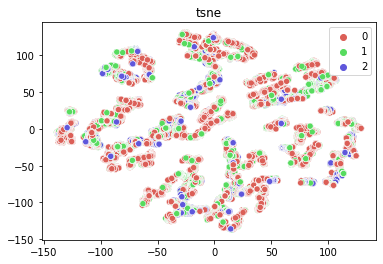

In [ ]:
#TSNE                                                                           #https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html
from sklearn.manifold import TSNE                                               #visualization of heigh dimentional data to low dimentional space by tunning the"perplexity,learning_rate,n_iter"
import seaborn as sns
xtsne=TSNE(perplexity=200,learning_rate=1000,n_iter=6000)
results=xtsne.fit_transform(dff3.drop(['fault_severity'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
data_y =dff3['fault_severity']

sns.scatterplot(vis_x,vis_y, hue=data_y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=dff3).set(title="tsne")

From TSNE at perplexity=200 in some region class0 cluster is forming, at some region class 1 cluster is forming and some region class2 cluster is forming with some overlapping.

mostly classes are overlapping but in some region clustering of classes are forming.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

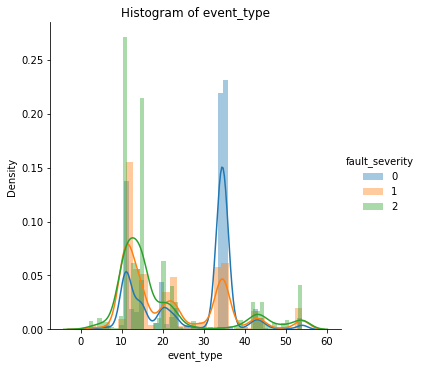

In [ ]:
sns.FacetGrid(dff3, hue="fault_severity", size=5) \
   .map(sns.distplot, "event_type") \
   .add_legend();
plt.title('Histogram of event_type') 
plt.show();

from this observation,density of points at lower event_type shows fault_severity(2) more and as the event_type increases btw(30 and 40) fault_severity(0) is more.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

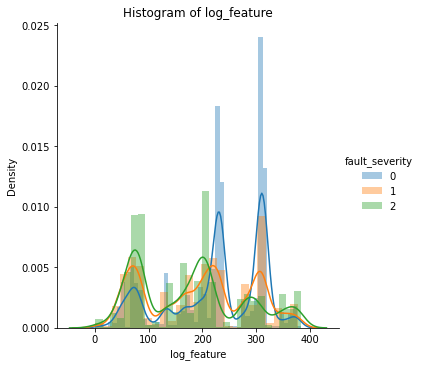

In [ ]:
sns.FacetGrid(dff3, hue="fault_severity", size=5) \
   .map(sns.distplot, "log_feature") \
   .add_legend();
plt.title('Histogram of log_feature') 
plt.show();

fault severity (0,1,2) are overlapping more but density of log feature points at(300)has (fault_severity 0) more.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

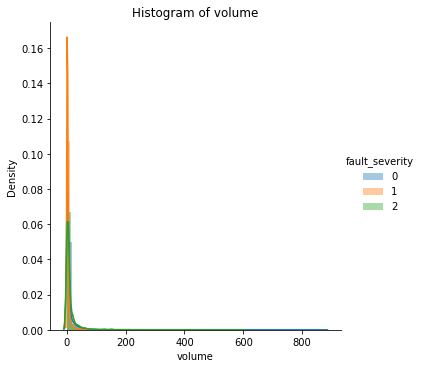

In [ ]:
sns.FacetGrid(dff3, hue="fault_severity", size=5) \
   .map(sns.distplot,'volume') \
   .add_legend();
plt.title('Histogram of volume') 
plt.show();

density of points at lesser volume has fault_severity (1) high.

density of points at lesser resource_type has higher fault_severity(0).also fault_severity(0,1,2) are less overlapping so this feature is useful in predicting the output.

density of points at lower severity type has fault severit(2) is more.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

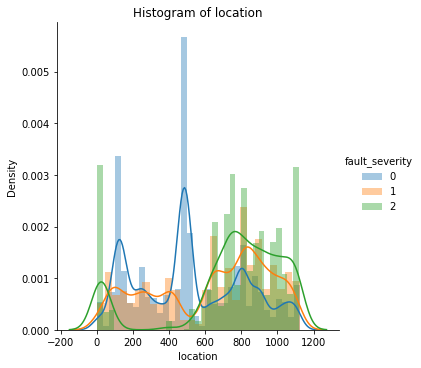

In [ ]:
sns.FacetGrid(dff3, hue="fault_severity", size=5) \
   .map(sns.distplot,'location') \
   .add_legend();
plt.title('Histogram of location') 
plt.show();

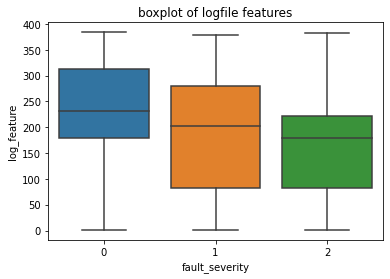

In [77]:
#BOXPLOT are used to check the outliers 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np                                                              #boxplot representation of feature log_feature
ax = sns.boxplot(x="fault_severity", y="log_feature", data=dff3)                
plt.title("boxplot of logfile features")
plt.show()

In [78]:
                                                                                #https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
Q1 = np.percentile(dff3['log_feature'], 25,interpolation = 'midpoint')          #to detect and remove outliers
Q3 = np.percentile(dff3['log_feature'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
upper = np.where(dff3['log_feature'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(dff3['log_feature'] <= (Q1-1.5*IQR))                                    #dropping the points which above upper bound and which are below lower bound
dff3.drop(upper[0],inplace=True)
dff3.drop(lower[0],inplace=True)

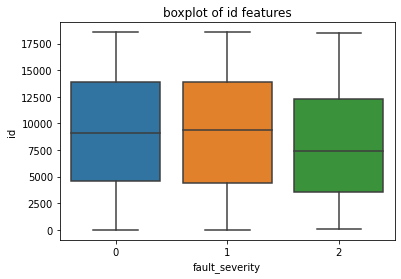

In [79]:
ax = sns.boxplot(x="fault_severity", y="id", data=dff3)                
plt.title("boxplot of id features")
plt.show()

In [85]:
Q1 = np.percentile(dff3['id'], 25,interpolation = 'midpoint')                   #to detect and remove outliers
Q3 = np.percentile(dff3['id'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
upper = np.where(dff3['id'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(dff3['id'] <= (Q1-1.5*IQR))                                    #dropping the points which above upper bound and which are below lower bound
dff3.drop(upper[0],inplace=True)
dff3.drop(lower[0],inplace=True)

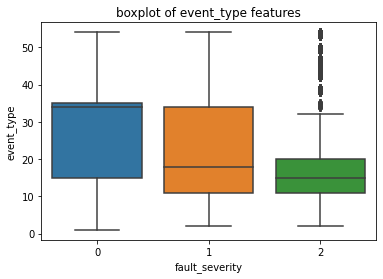

In [86]:
ax = sns.boxplot(x="fault_severity", y="event_type", data=dff3)                 ##boxplot representation of feature event_type
plt.title("boxplot of event_type features")
plt.show()

In [87]:
Q1 = np.percentile(dff3['event_type'], 25,interpolation = 'midpoint')
Q3 = np.percentile(dff3['event_type'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper = np.where(dff3['event_type'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(dff3['event_type'] <= (Q1-1.5*IQR))                            #dropping the points which above upper bound and which are below lower bound
dff3.drop(upper[0],inplace=True)
dff3.drop(lower[0],inplace=True)

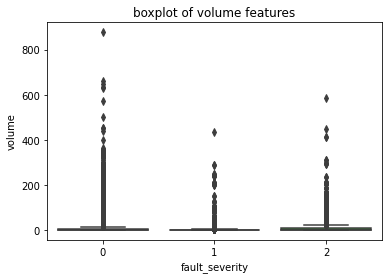

In [83]:
ax = sns.boxplot(x="fault_severity", y="volume", data=dff3)                     #boxplot representation of feature location
plt.title("boxplot of volume features")
plt.show()

In [ ]:
Q1 = np.percentile(dff3['event_type'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(dff3['event_type'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(dff3['event_type'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(dff3['event_type'] <= (Q1-1.5*IQR))                            #dropping the points which above upper bound and which are below lower bound
dff3.drop(upper[0],inplace=True)
dff3.drop(lower[0],inplace=True)

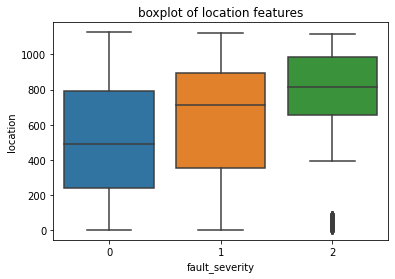

In [ ]:
ax = sns.boxplot(x="fault_severity", y="location", data=dff3)                   #boxplot representation of feature location
plt.title("boxplot of location features")
plt.show()

In [ ]:
Q1 = np.percentile(dff3['location'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(dff3['location'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(dff3['location'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(dff3['location'] <= (Q1-1.5*IQR))                              ##dropping the points which above upper bound and which are below lower bound
dff3.drop(upper[0], inplace = True)
dff3.drop(lower[0], inplace = True)

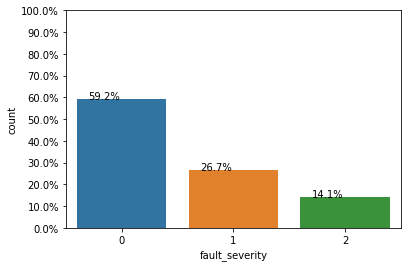

In [88]:
import numpy as np                                                              #distribution of fault_severity
total = len(dff3)*1.
ax=sns.countplot(x="fault_severity", data=dff3)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

from the above graph it is a Multiclass classification with imbalanced data

In [89]:
y=dff3['fault_severity']
X=dff3.drop(['fault_severity'],axis=1)
print(X)
print(y)

          id  event_type  log_feature  volume  resource_type 1  \
61369   2123           2            1       1                0   
2078   13382          28            1       1                0   
2077   13382          28            1       1                0   
2066   13382           2            1       1                0   
2065   13382           2            1       1                0   
...      ...         ...          ...     ...              ...   
19609   7378          20          383       1                0   
19607   7378          20          383       1                0   
376     4630           1          384       2                0   
370     4630          11          384       2                0   
364     4630          15          384       2                0   

       resource_type 10  resource_type 2  resource_type 3  resource_type 4  \
61369                 0                0                0                0   
2078                  0                0           

In [90]:
from sklearn.model_selection import train_test_split                            #splitting the data to train,cv and test data
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.33,stratify=y)
Xtrain,Xcv,ytrain,ycv=train_test_split(Xtrain,ytrain,test_size=0.33,stratify=ytrain)
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)
print(Xcv.shape)
print(ycv.shape)


(27759, 20)
(27759,)
(20407, 20)
(20407,)
(13673, 20)
(13673,)


In [91]:
print(np.unique(ycv))
print(np.unique(ytest))
print(np.unique(ytrain))

[0 1 2]
[0 1 2]
[0 1 2]


In [102]:
#Normalizing the Train data
def normalize(df):        
    result1 = df.copy()
    for feature_name in df.columns:
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(Xtrain)
Xtrain1=result
print(Xtrain1.columns)


Index(['id', 'event_type', 'log_feature', 'volume', 'resource_type 1',
       'resource_type 10', 'resource_type 2', 'resource_type 3',
       'resource_type 4', 'resource_type 5', 'resource_type 6',
       'resource_type 7', 'resource_type 8', 'resource_type 9',
       'severity_type 1', 'severity_type 2', 'severity_type 3',
       'severity_type 4', 'severity_type 5', 'location'],
      dtype='object')


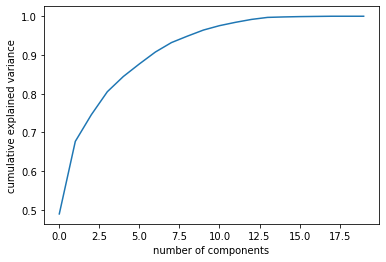

In [103]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(Xtrain1)                                #Choosing the number of components. this can be obtain by looking into  cumulative explained variance ratio."feature selection"
Xtrain2=principalComponents
cum_sum_exp=np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(0,len(cum_sum_exp)),cum_sum_exp)                                
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');



*   first 3 components contain aprrox 60% of the variance
*   first 7 components contain approx 90% of the variance 

*   first 11 components contain approx 95% of the variance and rest of the components contain only 5% of variance(contain less information)


In [ ]:
print(pca.explained_variance_ratio_)

[4.89082215e-01 1.87917234e-01 6.95439600e-02 5.92879854e-02
 3.96529203e-02 3.25613950e-02 3.06529821e-02 2.43757781e-02
 1.64788508e-02 1.51754087e-02 1.12005464e-02 8.60959495e-03
 7.31263921e-03 5.26526001e-03 1.34688179e-03 7.41308390e-04
 4.62948495e-04 3.32091301e-04 2.39226538e-33 2.17030524e-33]


In [116]:
#Feature Extraction using PCA
import pandas as pd
pca1 = PCA(n_components=1)
principalComponents = pca1.fit_transform(Xtrain1)
p2=pca1.transform(Xtest)
p3=pca1.transform(Xcv)
dfp1=pd.DataFrame(data=principalComponents ,columns=['pca1'])
dfp2=pd.DataFrame(data=p2 ,columns=['pca1'])
dfp3=pd.DataFrame(data=p3 ,columns=['pca1'])
dp1=pd.concat([Xtrain1,ytrain,dfp1],axis = 1,join='inner')
dp2=pd.concat([Xtest,ytest,dfp2],axis = 1,join='inner')
dp3=pd.concat([Xcv,ycv,dfp3],axis = 1,join='inner')


Xtrainn=dp1.drop(['fault_severity','location'],axis=1)                          #using pca removed "location"
ytrainn=dp1['fault_severity']
Xtestt=dp2.drop(['fault_severity','location'],axis=1)
ytestt=dp2['fault_severity']
Xcvv=dp3.drop(['fault_severity','location'],axis=1)
ycvv=dp3['fault_severity']
print(Xtrainn)

             id  event_type  log_feature    volume  resource_type 1  \
17818  0.065394    0.622642     0.814621  0.000000              0.0   
16812  0.290258    0.641509     0.603133  0.036530              0.0   
24114  0.906464    0.358491     0.783290  0.000000              0.0   
17520  0.525096    0.622642     0.112272  0.002283              0.0   
19967  0.109817    0.641509     0.798956  0.000000              0.0   
...         ...         ...          ...       ...              ...   
22671  0.073104    0.622642     0.798956  0.000000              0.0   
23720  0.773788    0.641509     0.603133  0.000000              0.0   
26055  0.827376    0.622642     0.603133  0.057078              0.0   
2347   0.289935    0.226415     0.898172  0.000000              0.0   
25548  0.818589    0.622642     0.605744  0.001142              0.0   

       resource_type 10  resource_type 2  resource_type 3  resource_type 4  \
17818               0.0              1.0              0.0            

In [ ]:
dff1.to_csv('xtrain_data2')

          id  event_type  log_feature  volume  resource_type 1  \
3426   11586          14          163       1                0   
11393   2977          22          222       4                0   
20534  17313          34          312       5                0   
12864   6090          35          233       1                0   
10      4848          11           80      16                0   
...      ...         ...          ...     ...              ...   
4631   10958          13           68       1                0   
27084  11149          34          228       3                0   
2353    5379          11          179       2                0   
9334   17160          34          235       2                0   
10647   7700          35          235       4                0   

       resource_type 10  resource_type 2  resource_type 3  resource_type 4  \
3426                  0                0                0                0   
11393                 1                0           

In [118]:
#logistic regression
alpha = [10 ** x for x in range(-10,1)]
print(alpha)
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l1',C=i,class_weight='balanced',solver='saga',n_jobs=-1)
    logisticR.fit(Xtrainn,ytrainn)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(Xtrainn, ytrainn)
    predict_y = sig_clf.predict_proba(Xcvv)
    cv_log_error_array.append(log_loss(ycvv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
best_alpha = np.argmin(cv_log_error_array)
    
logisticR=LogisticRegression(penalty='l1',C=alpha[best_alpha],class_weight='balanced',solver='saga',n_jobs=-1)
logisticR.fit(Xtrainn,ytrainn)
sig_clf2 = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf2.fit(Xtrainn, ytrainn)
pred_y=sig_clf2.predict(Xtestt)

predict_y = sig_clf2.predict_proba(Xtrainn)
print ('For values of best alpha = ', alpha[best_alpha],'log loss for train data',log_loss(ytrainn, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf2.predict_proba(Xcvv)
print ('For values of best alpha = ', alpha[best_alpha],'log loss for cv data',log_loss(ycvv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf2.predict_proba(Xtestt)
print ('For values of best alpha = ', alpha[best_alpha],'log loss for test data',log_loss(ytestt, predict_y, labels=logisticR.classes_, eps=1e-15))

C = confusion_matrix(ytestt, sig_clf2.predict(Xtestt))
print('confusion',C)
print('*'*100)
A =(((C.T)/(C.sum(axis=1))).T)
print('recal',A)
print('*'*100)
B =(C/C.sum(axis=0))
print('precision',B)

[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]
For values of best alpha =  0.001 log loss for train data 0.7646529669931372
For values of best alpha =  0.001 log loss for cv data 0.8630302855389683
For values of best alpha =  0.001 log loss for test data 0.8266471776303964
confusion [[4202    0    0]
 [1661    0    0]
 [ 852    0    0]]
****************************************************************************************************
recal [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
****************************************************************************************************
precision [[0.62576322        nan        nan]
 [0.24735666        nan        nan]
 [0.12688012        nan        nan]]


In [119]:
from prettytable import PrettyTable
myTable = PrettyTable(["Model", "best_value_of_alpha()", "train logloss","test logloss"])
myTable.add_row([ "Random_model", "0", "1.3334218371646078","1.3454495697543558"])
myTable.add_row([ "KNN", "13", "0.39710374302815205","0.9553196273337947"])
myTable.add_row([ "Logistic_Regression(using PCA)", "0.001","0.7646529669931372","0.8266471776303964"])
myTable.add_row(["Random_Forest", "d=50,s=10,e=10", "0.2933148736070975",'0.9580244208360646'])

print(myTable)

+--------------------------------+-----------------------+---------------------+--------------------+
|             Model              | best_value_of_alpha() |    train logloss    |    test logloss    |
+--------------------------------+-----------------------+---------------------+--------------------+
|          Random_model          |           0           |  1.3334218371646078 | 1.3454495697543558 |
|              KNN               |           13          | 0.39710374302815205 | 0.9553196273337947 |
| Logistic_Regression(using PCA) |         0.001         |  0.7646529669931372 | 0.8266471776303964 |
|         Random_Forest          |     d=50,s=10,e=10    |  0.2933148736070975 | 0.9580244208360646 |
+--------------------------------+-----------------------+---------------------+--------------------+


##Making a predictive system

In [120]:
input_data=[11401,34,358,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,-1.0964379603238992]
#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
prediction=logisticR.predict(input_data_reshaped)
print(prediction)
if prediction[0]==0:
  print('no fault in the telstra network')
if prediction[0]==1:
  print('few faults in the telstra network')
if prediction[0]==2:
  print('many faults in the telstra network')





[1]
few faults in the telstra network


##Saving the trained model 

In [121]:
import pickle
filename='trained_model_lg.sav'
pickle.dump(logisticR,open(filename,'wb'))

In [122]:
#loadig the saved model
loaded_model=pickle.load(open('trained_model_lg.sav','rb'))

In [123]:
input_data=[11401,34,358,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,-1.0964379603238992]
#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshaped)
print(prediction)
if prediction[0]==0:
  print('no fault in the telstra network')
if prediction[0]==1:
  print('few faults in the telstra network')
if prediction[0]==2:
  print('many faults in the telstra network')





[1]
few faults in the telstra network
